# Clustering

In [9]:
import sys
 
# add python folder
sys.path.insert(0, 'python')

from embeddingStructure import embeddingStructure
import matplotlib.pyplot as plt
from batch import batch
import numpy as np
from tqdm import tqdm
import clustering

In [4]:
# Create batches
filename = "/home/ubuntu/sampled_embeddings.csv"
features = 1024

batch_01 = batch()
batch_01.load(filename, 1, 1000)

# Create matrix in correct format
X = np.empty((len(batch_01.items), features), dtype=np.float16)
for i in range(len(batch_01.items)):
    X[i,:] = batch_01.items[i].data

In [6]:
# set cluster
cluster = clustering.Cluster()
cluster.set_metric(clustering.METRIC.COSINE)

### Plot loss function 

In [17]:
Steps = 20
loss = np.empty(Steps - 1 )
lossxValue = np.empty(Steps - 1)
for i in range(0, Steps - 1):
    cluster.load(X)
    cluster.k = i + 1
    cluster.set_random_centroids()
    cluster.run_iteration(3)
    loss[i] = cluster.loss
    lossxValue[i] = i + 1

381.0135015831169
381.0135015831169
381.0135015831169
365.40248752085904
360.35936482597725
358.8046521818357
346.61425443795434
339.0320574388451
337.4516239015037
349.49884366715185
332.73926624162516
329.58630713872714
336.5814391479513
327.7801964830235
325.87904461298245
335.26955273339706
320.2157811058932
316.3739202496661
336.3651636763714
323.84694257443215
319.4825964753561
318.980297653543
307.9197698034972
303.76671800647773
321.7120944303368
308.8273168288215
303.23416842844847
317.1459896882859
303.9104028235849
297.1479579225242
306.0275617970667
296.5739209443097
292.7085891748992
305.99036171685214
295.26683048185265
292.8667669783661
304.6950592731243
290.4863669456297
287.1000441158379
298.0646313648835
288.91938562670754
284.24551751284855
302.262429962919
291.2970377195096
287.05869368072695
295.2120794009229
280.77822165193567
277.24426503553605
299.1313094076239
285.38122893911753
278.776807150404
299.99485739158985
283.5870606169417
278.0822231859091
293.7012832

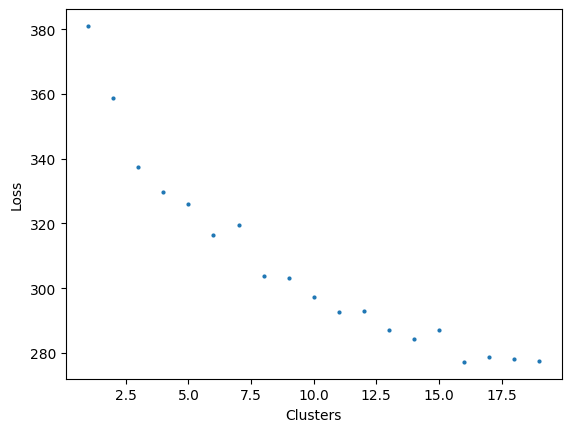

In [18]:
# plot loss function
plt.scatter(lossxValue, loss, s = 4)
plt.xlabel("Clusters")
plt.ylabel("Loss")
plt.show()

# Note: You will notice some variability because the medoids are selected randomly, so just
# make sure you have the correct number of iterations, the treand should be similar.

### Creating clusters

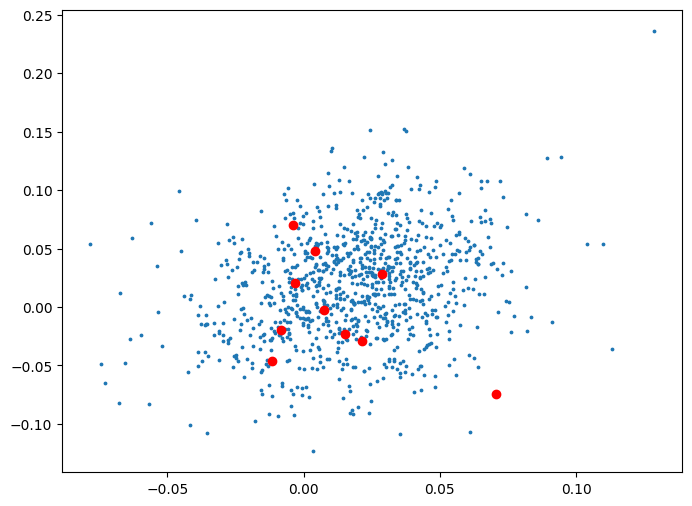

319.47434212371894
303.632263100992
297.4352234258545
294.2297126551981
293.13945107105553
292.7963544981633
292.5896057690001
292.4266457893829
292.2935008941316
292.19317179394443
292.1550364320458
292.1051843337943
292.0811515846869
292.06795313427114
292.0557460788407
292.03110054437093
292.03110054437093
292.03110054437093
292.03110054437093
292.03110054437093


In [16]:
# Using our implementation we run using k = 3
cluster.load(X)
cluster.k = 10
cluster.set_metric(clustering.METRIC.COSINE)
cluster.set_random_centroids()
cluster.plot_datapoints(0,1)
cluster.run_iteration(20)

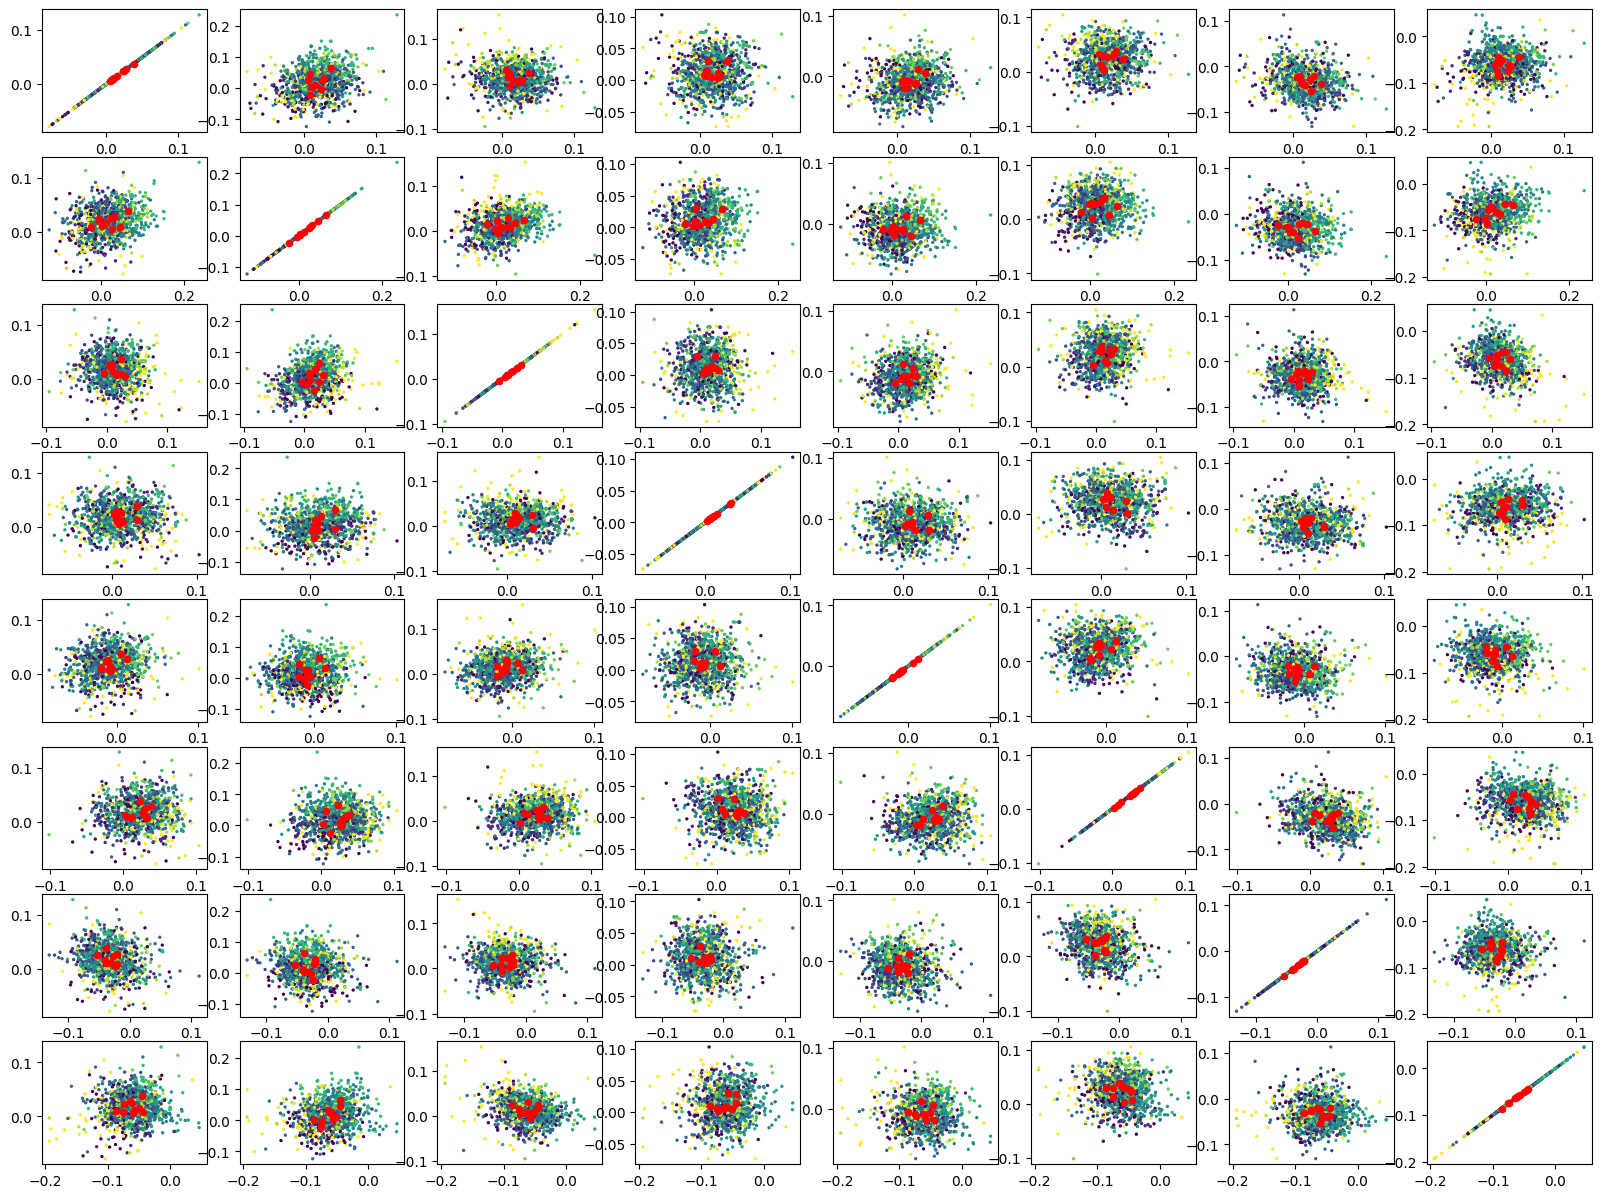

In [14]:
# we plot only 8x8 features at the time and start with the index 0-0
cluster.plot_classification_map(0,0)